In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

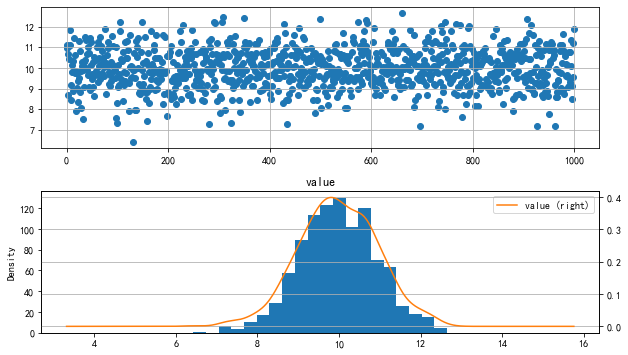

In [14]:
s = pd.DataFrame(np.random.randn(1000)+ 10, columns = ['value'])

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(s.index, s.values)
plt.grid()


ax2 = fig.add_subplot(2,1,2)
s.hist(bins = 20,ax = ax2)
s.plot(kind = 'kde', secondary_y = True,ax = ax2)
plt.grid()

       value
0  10.850925
1  10.603936
2   8.819566
3  10.188534
4  10.017855
9.986771602856408 1.0047458264938813
-----


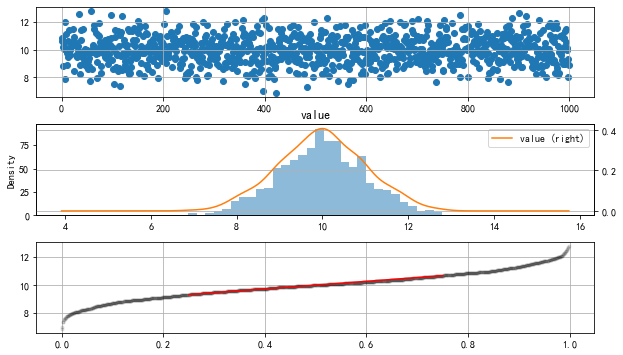

In [41]:
s = pd.DataFrame(np.random.randn(1000)+10, columns = ['value'])
print(s.head())

mean = s['value'].mean()
std = s['value'].std()
print(mean,std)
print('-----')
s.sort_values(by = 'value', inplace = True)
s_r = s.reset_index(drop = False)
s_r['p'] = (s_r.index - 0.5) / len(s_r)
s_r['q'] = (s_r['value']-mean) / std

st = s['value'].describe()
x1,y1 = 0.25, st['25%']
x2,y2 = 0.75, st['75%']


fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(3,1,1)
ax1.scatter(s.index, s.values)
plt.grid()

ax2 = fig.add_subplot(3,1,2)
s.hist(bins = 30, alpha = 0.5,ax = ax2)
s.plot(kind = 'kde', secondary_y = True, ax = ax2)
plt.grid()

ax3 = fig.add_subplot(3,1,3)
ax3.plot(s_r['p'], s_r['value'], 'k.',alpha = 0.1)
ax3.plot([x1,x2],[y1,y2],'-r')
plt.grid()

,血糖浓度,次数,累计次数,累计频率,标准化取值,理论分布,D
0,68,2,2,0.057143,-1.977701,0.0244,0.032743
1,72,2,4,0.114286,-1.304031,0.0968,0.017486
2,75,2,6,0.171429,-0.798779,0.2148,0.043371
3,76,2,8,0.228571,-0.630362,0.2643,0.035729
4,77,6,14,0.400000,-0.461945,0.3228,0.077200
5,78,3,17,0.485714,-0.293527,0.3859,0.099814
6,80,6,23,0.657143,0.043307,0.5160,0.141143
7,81,3,26,0.742857,0.211725,0.5832,0.159657
8,84,2,28,0.800000,0.716977,0.7611,0.038900
9,86,2,30,0.857143,1.053811,0.8531,0.004043


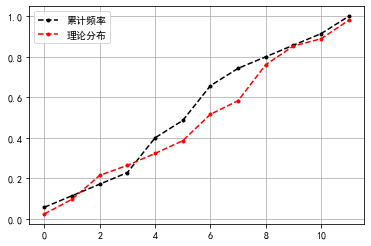

In [53]:
data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
df = pd.DataFrame(data, columns = ['value'])
u = df['value'].mean()
std = df['value'].std()

s = df['value'].value_counts().sort_index()
df_s = pd.DataFrame({'血糖浓度':s.index,'次数':s.values})
df_s['累计次数'] = df_s['次数'].cumsum()
df_s['累计频率'] = df_s['累计次数'] / len(data)
df_s['标准化取值'] = (df_s['血糖浓度'] - u) / std
df_s['理论分布'] =[0.0244,0.0968,0.2148,0.2643,0.3228,0.3859,0.5160,0.5832,0.7611,0.8531,0.8888,0.9803]
df_s['D'] = np.abs(df_s['累计频率'] - df_s['理论分布'])
dmax = df_s['D'].max()

df_s['累计频率'].plot(style = '--k.')
df_s['理论分布'].plot(style = '--r.')
plt.legend(loc = 'upper left')
plt.grid()
df_s

In [56]:
data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
df = pd.DataFrame(data, columns = ['value'])
u = df['value'].mean()
std = df['value'].std()
stats.kstest(df['value'], 'norm', (u,std))

KstestResult(statistic=0.1590180704824098, pvalue=0.3056480127078781)